In [43]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
!pip install seaborn
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\BA\\part3\\data mining\\marketing_campaign.csv', sep='\t')

In [94]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


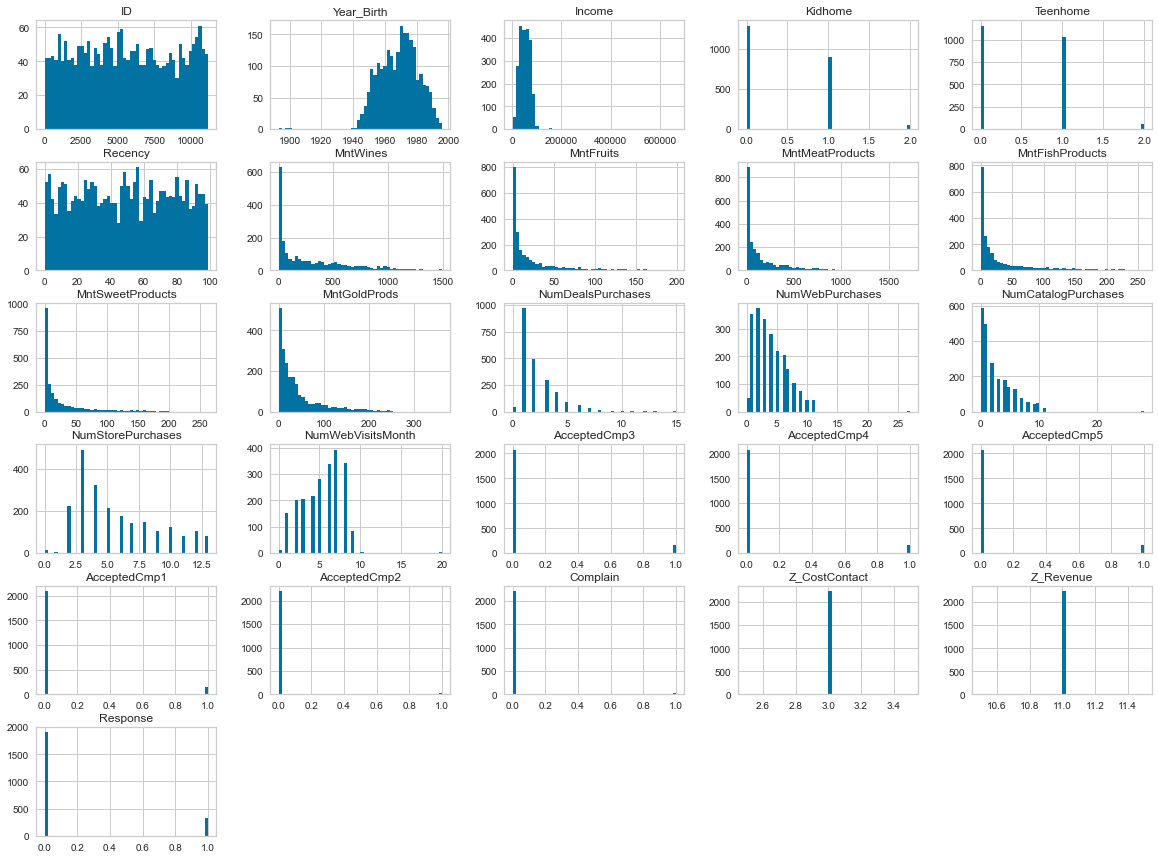

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
corr_matrix =df.corr()

In [8]:
print(corr_matrix)

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.03

In [9]:
df["Year_Birth"].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64

In [10]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [11]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [13]:
df["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [14]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [95]:
df=df.dropna(subset=["Income"]) 

In [96]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='MntWines', ylabel='Income'>,
        <AxesSubplot:xlabel='MntFruits', ylabel='Income'>,
        <AxesSubplot:xlabel='MntMeatProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntFishProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntSweetProducts', ylabel='Income'>,
        <AxesSubplot:xlabel='MntGoldProds', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntWines', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntFruits', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntMeatProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntFishProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntSweetProducts', ylabel='MntWines'>,
        <AxesSubplot:xlabel='MntGoldProds', ylabel='MntWines'>],
       [<AxesSubplot:xlabel='Income', ylabel='MntFruits'>,
        <AxesSubplot:xlabel='MntWines', ylabel='MntFruits'>,
  

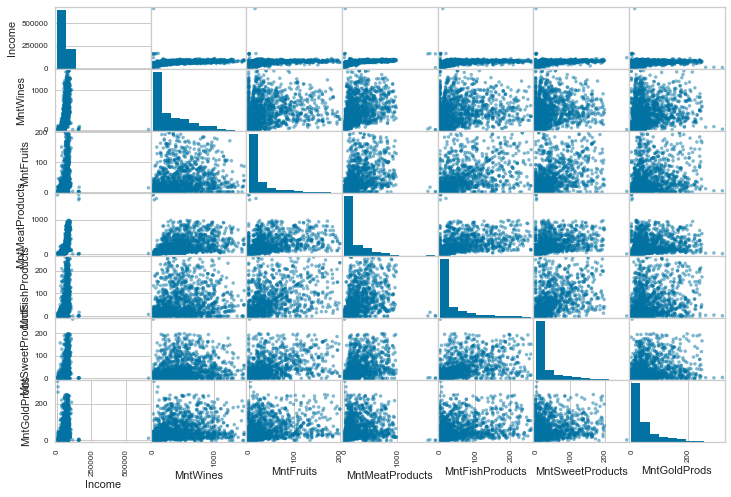

In [62]:
from pandas.plotting import scatter_matrix
attributes = ["Income", "MntWines", "MntFruits",
 "MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [97]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [98]:
#creation d'une feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [99]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2.216000e+03
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,4.423735e+16
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,2.008532e+16
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000e+00
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.937600e+16
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4.432320e+16
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.927040e+16
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,9.184320e+16


In [100]:
df["Age"] = 2020-df["Year_Birth"]

In [101]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [102]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [103]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [104]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["IncomePer"] =df["Income"]/df["Family_Size"]

In [105]:
to_drop = ["Marital_Status", "Dt_Customer","Year_Birth","Income",'Z_CostContact','Z_Revenue']
df= df.drop(to_drop, axis=1)

In [106]:
df["Age"].value_counts()

44    89
49    86
45    83
48    78
42    76
50    75
55    74
47    72
51    70
46    69
64    55
41    53
62    52
68    52
52    51
43    51
54    50
61    50
60    49
66    49
65    48
57    44
58    44
53    44
38    44
69    42
37    41
34    41
63    41
56    41
40    39
36    38
39    38
59    35
67    35
35    32
71    30
70    29
32    29
31    29
33    27
72    21
30    18
74    16
73    16
29    15
28    13
75     8
76     7
77     6
25     5
27     5
26     3
24     2
79     1
80     1
Name: Age, dtype: int64

In [107]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [108]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [109]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [110]:
selected_attributes = ['Education', 'IncomePer', 'Kidhome','Teenhome','Age','Spent','Living_With','Children','Family_Size','Is_Parent','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']
data1 = df[selected_attributes].copy()

In [111]:
#Scaling
scaler = StandardScaler()
scaler.fit(data1)
data1 = pd.DataFrame(scaler.transform(data1),columns= data1.columns )

print("All features are now scaled")

All features are now scaled


In [112]:
data1.head()

,Education,IncomePer,Kidhome,Teenhome,Age,Spent,Living_With,Children,Family_Size,Is_Parent,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,-0.352543,1.704518,-0.822754,-0.929699,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,...,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181
1,-0.352543,-0.484527,1.040021,0.908097,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,...,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545
2,-0.352543,0.559410,-0.822754,-0.929699,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,...,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908
3,-0.352543,-0.821216,1.040021,-0.929699,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,...,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818
4,1.429916,-0.280288,1.040021,-0.929699,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,...,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545


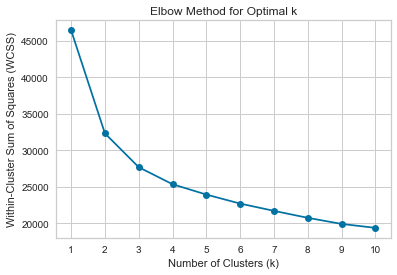

In [113]:
from sklearn.cluster import KMeans

k_values = range(1, 11) 

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Iterate over each value of k
for k in k_values:
    # Initialize the k-means clustering algorithm with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the subset data
    kmeans.fit(data1)
    
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

In [114]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data1)
data1["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

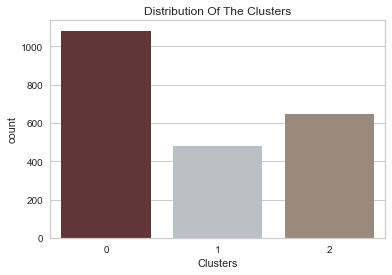

In [115]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

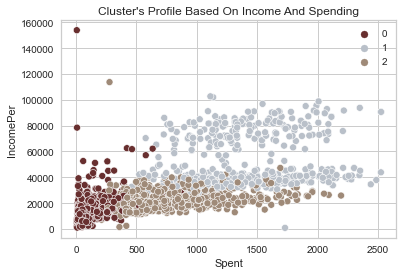

In [116]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["IncomePer"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

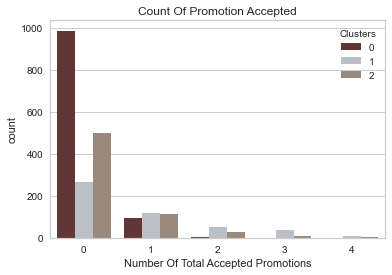

In [117]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

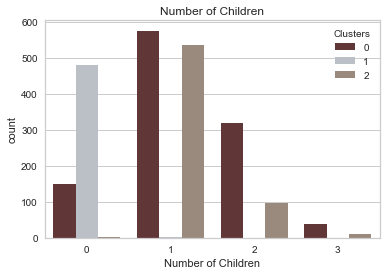

In [122]:
plt.figure()
pl = sns.countplot(x=df["Children"],hue=df["Clusters"], palette= pal)
pl.set_title("Number of Children")
pl.set_xlabel("Number of Children")
plt.show()

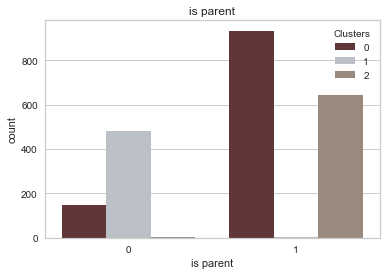

In [123]:
plt.figure()
pl = sns.countplot(x=df["Is_Parent"],hue=df["Clusters"], palette= pal)
pl.set_title("is parent")
pl.set_xlabel("is parent")
plt.show()

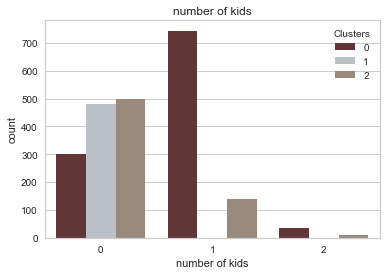

In [124]:
plt.figure()
pl = sns.countplot(x=df["Kidhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of kids")
pl.set_xlabel("number of kids")
plt.show()

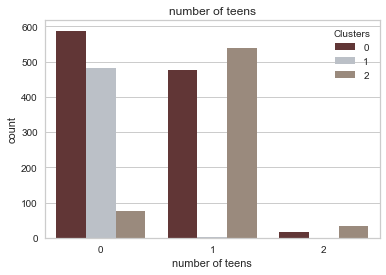

In [125]:
plt.figure()
pl = sns.countplot(x=df["Teenhome"],hue=df["Clusters"], palette= pal)
pl.set_title("number of teens")
pl.set_xlabel("number of teens")
plt.show()

In [109]:
#!pip install mlxtend

   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
#data1.describe()
df.describe()

,ID,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,IncomePer,Total_Promos,Clusters
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,2.395570,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,4.424926e+16,51.086347,607.268083,0.645570,0.947559,2.593128,0.714286,24897.074842,0.298373,0.803797
std,3247.523735,1.122299,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,2.009245e+16,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856,19506.063431,0.679570,0.862519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,24.000000,5.000000,0.000000,0.000000,1.000000,0.000000,815.666667,0.000000,0.000000
25%,2814.750000,2.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,2.937600e+16,43.000000,69.000000,0.000000,0.000000,2.000000,0.000000,12102.333333,0.000000,0.000000
50%,5454.500000,2.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,4.432320e+16,50.000000,397.000000,1.000000,1.000000,3.000000,1.000000,18644.166667,0.000000,1.000000
75%,8418.500000,3.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,5.927040e+16,61.000000,1048.000000,1.000000,1.000000,3.000000,1.000000,31954.125000,0.000000,2.000000
max,11191.000000,4.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,9.184320e+16,80.000000,2525.000000,1.000000,3.000000,5.000000,1.000000,153924.000000,4.000000,2.000000


In [172]:
percentile_25 = df['MntSweetProducts'].quantile(0.25)
#print(percentile_75)
#median_value = df['MntGoldProds'].median()
#mean_value = df['MntGoldProds'].mean()
print(percentile_25)

1.0


In [167]:
cluster_means = df.groupby("Clusters").mean()

# Print cluster means
print("Cluster means:")
print(cluster_means)

Cluster means:
                   ID  Education   Kidhome  Teenhome    Recency    MntWines  \
Clusters                                                                      
0         5570.475046   2.283734  0.756007  0.472274  48.738447   51.093346   
1         5638.199170   2.448133  0.002075  0.002075  49.261411  619.186722   
2         5570.231481   2.543210  0.243827  0.936728  49.308642  496.242284   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Clusters                                                                 ...   
0          5.853050        26.203327         8.315157          5.749538  ...   
1         64.475104       480.039419        93.821577         64.703320  ...   
2         32.146605       169.350309        44.845679         34.597222  ...   

          Response  Customer_For        Age        Spent  Living_With  \
Clusters                                                                
0         0.091497  4.154339e+16  49.05268

In [152]:
#!pip install pyfpgrowth

In [175]:
#import pyfpgrowth

# Define the unique cluster numbers
clusters = df['Clusters'].unique()

# Specify the minimum support threshold
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 175.50:
            transaction.append('wine')
        if row['MntFruits'] > 8:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 68:
            transaction.append('meat')
        if row['MntFishProducts'] > 12:
            transaction.append('fish')
        if row['MntSweetProducts'] >8:
            transaction.append('sweet')
        if row['MntGoldProds'] > 24.5:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'meat', 'wine'), Support: 1
Itemset: ('meat', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'sweet', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'meat'), Support: 1
Itemset: ('fruits', 'meat', 'sweet'), Support: 1
Itemset: ('fish', 'fruits', 'sweet'

In [176]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1



In [173]:
min_support = 0.1
top_supported_itemsets = {}
# Iterate over each cluster
for cluster in clusters:
    # Filter the main dataset for the current cluster
    cluster_data = df[df['Clusters'] == cluster]
    # Convert the cluster data into transaction format
    transactions = []
    for index, row in cluster_data.iterrows():
        # Create a list to store items in the transaction
        transaction = []
        if row['MntWines'] > 24:
            transaction.append('wine')
        if row['MntFruits'] > 2:
            transaction.append('fruits')
        if row['MntMeatProducts'] > 16:
            transaction.append('meat')
        if row['MntFishProducts'] > 3:
            transaction.append('fish')
        if row['MntSweetProducts'] > 1:
            transaction.append('sweet')
        if row['MntGoldProds'] > 1:
            transaction.append('gold')

    transactions.append(transaction)
    
    # Apply FP-Growth algorithm to find frequent itemsets for the current cluster
    patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
    sorted_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:3]
    top_supported_itemsets[cluster] = sorted_patterns
    # Print frequent itemsets with their support for the current cluster
    print(f"Frequent itemsets for Cluster {cluster}:")
    for itemset, support in patterns.items():
        print(f"Itemset: {itemset}, Support: {support}")
        
    print()


Frequent itemsets for Cluster 1:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1
Itemset: ('fish',), Support: 1
Itemset: ('sweet',), Support: 1
Itemset: ('gold',), Support: 1
Itemset: ('fruits', 'wine'), Support: 1
Itemset: ('meat', 'wine'), Support: 1
Itemset: ('fish', 'wine'), Support: 1
Itemset: ('sweet', 'wine'), Support: 1
Itemset: ('gold', 'wine'), Support: 1
Itemset: ('fruits', 'meat'), Support: 1
Itemset: ('fish', 'fruits'), Support: 1
Itemset: ('fruits', 'sweet'), Support: 1
Itemset: ('fruits', 'gold'), Support: 1
Itemset: ('fish', 'meat'), Support: 1
Itemset: ('meat', 'sweet'), Support: 1
Itemset: ('gold', 'meat'), Support: 1
Itemset: ('fish', 'sweet'), Support: 1
Itemset: ('fish', 'gold'), Support: 1
Itemset: ('gold', 'sweet'), Support: 1
Itemset: ('fruits', 'meat', 'wine'), Support: 1
Itemset: ('fish', 'fruits', 'wine'), Support: 1
Itemset: ('fruits', 'sweet', 'wine'), Support: 1
Itemset: ('fruits', 'gold', 'wine'), Support: 1


In [174]:
for cluster, itemsets in top_supported_itemsets.items():
    print(f"Cluster {cluster}: Top three itemsets with the most support:")
    for itemset, support in itemsets:
        print(f"Itemset: {itemset}, Support: {support}")
    print()

Cluster 1: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 0: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

Cluster 2: Top three itemsets with the most support:
Itemset: ('wine',), Support: 1
Itemset: ('fruits',), Support: 1
Itemset: ('meat',), Support: 1

